In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- Utilização das libs para alguns fins (clonar para responder as perguntas com gráfico)

In [3]:
# lendo o doc
df = pd.read_excel('data_cli.xlsx')
df.head(10)

,ProdutoID,Produto,VendasID,Vendedor,Quantidade,Data,ValorUnitario,ValorTotal,Desconto,TotalComDesconto,ClienteID,Cliente,Estado,Sexo,Status
0,1,Bicicleta Aro 29 Mountain Bike Endorphine 6.3 ...,346,Iberê Lacerda,2,2016-11-16,7966.80,15933.60,3186.7200,12746.8800,219,Honorina Camarinho,PR,F,Silver
1,1,Bicicleta Aro 29 Mountain Bike Endorphine 6.3 ...,397,Capitolino Bahía,1,2016-12-23,7524.20,7524.20,2859.1960,4665.0040,65,Carlos Murici,MG,M,Silver
2,1,Bicicleta Aro 29 Mountain Bike Endorphine 6.3 ...,399,Godo Capiperibe,1,2016-12-25,6771.78,6771.78,2437.8408,4333.9392,62,Capitolina Ruela,PI,F,Silver
3,1,Bicicleta Aro 29 Mountain Bike Endorphine 6.3 ...,292,Jéssica Castelão,2,2016-09-29,6771.78,13543.56,2437.8408,11105.7192,5,Adélio Lisboa,SE,M,Silver
4,1,Bicicleta Aro 29 Mountain Bike Endorphine 6.3 ...,379,Jéssica Castelão,1,2016-12-11,7524.20,7524.20,2407.7440,5116.4560,75,Celestino Pereira,RS,M,Silver
5,1,Bicicleta Aro 29 Mountain Bike Endorphine 6.3 ...,377,Simão Rivero,1,2016-12-10,8852.00,8852.00,2390.0400,6461.9600,200,Gonçalo Figueiró,PI,M,Silver
6,1,Bicicleta Aro 29 Mountain Bike Endorphine 6.3 ...,389,Napoleão Méndez,1,2016-12-19,8852.00,8852.00,2390.0400,6461.9600,148,Eusébio Bairros,SP,M,Silver
7,1,Bicicleta Aro 29 Mountain Bike Endorphine 6.3 ...,286,Tobias Furtado,2,2016-09-26,7524.20,15048.40,2257.2600,12791.1400,145,Ester Castanho,AC,F,Silver
8,1,Bicicleta Aro 29 Mountain Bike Endorphine 6.3 ...,393,Godo Capiperibe,1,2016-12-21,6771.78,6771.78,2234.6874,4537.0926,168,Flamínia Miera,MT,F,Silver
9,1,Bicicleta Aro 29 Mountain Bike Endorphine 6.3 ...,334,Hélio Liberato,1,2016-11-05,8852.00,8852.00,2035.9600,6816.0400,141,Epaminondas Sousa de Arronches,MS,M,Silver


Text(0.5, 1.0, 'Produtos mais vendidos')

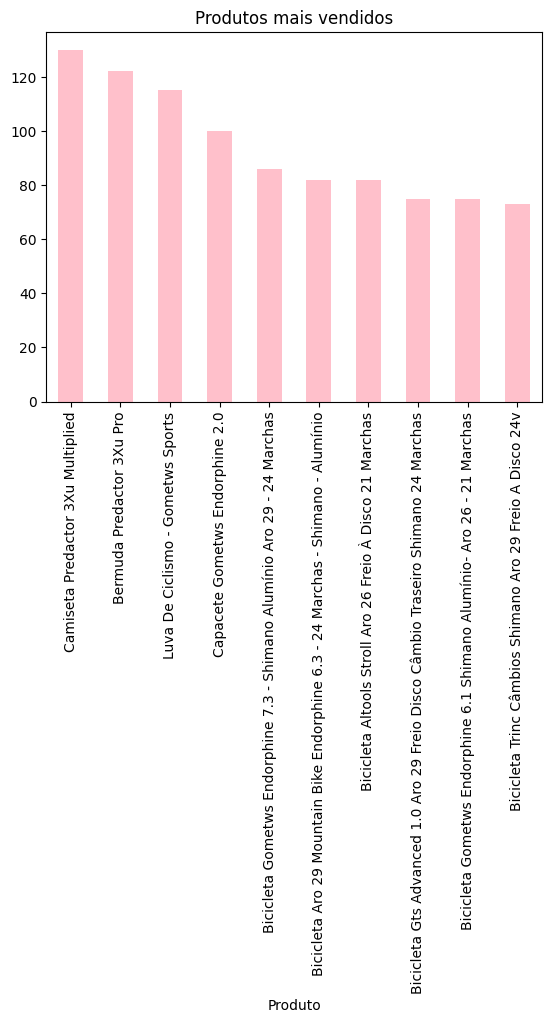

In [4]:
#Qual é o produto mais vendido em termos de quantidade?
df.Produto.value_counts().plot(kind='bar', color='pink')
plt.title('Produtos mais vendidos')

In [ ]:
#Qual é o produto que gerou mais receita? 

In [ ]:
#Qual o valor total de vendas por produto?
total_quantidade = df.groupby("Produto")["ValorTotal"].sum().reset_index()
plt.bar(df['Produto'], df['ValorTotal'], color='pink')

In [ ]:
#Qual o valor médio de vendas por produto?

In [ ]:
#Qual é o desconto médio concedido nas vendas?

In [ ]:
#Qual é o valor total de descontos concedidos?

In [ ]:
#Quais produtos recebem maiores descontos?

In [ ]:
#Qual é o vendedor com mais vendas em termos de valor?

In [ ]:
#Qual é o vendedor com mais vendas em termos de quantidade?

In [ ]:
#Qual é o valor médio de vendas por vendedor?

In [ ]:
#Qual é o cliente com mais compras em termos de valor total?

In [ ]:
#Qual é o cliente com mais compras em termos de quantidade?

In [ ]:
#Quais são os estados com maior volume de vendas?

In [ ]:
#Qual é a distribuição de compras por gênero?

In [ ]:
#Quais são os períodos com mais vendas?

In [ ]:
#Qual é a variação nas vendas ao longo do tempo?

In [ ]:
#Qual é o dia da semana com maior volume de vendas?

In [ ]:
#Qual a margem de lucro média por venda?

In [ ]:
#Qual é a rentabilidade por produto?